## MUSIC GENRE CLASSIFICATION 

The goal of this project is to use traditional Machine Learning algorithms and Artificial Neural Networks that can learn to classify an input audio signal(music file) into one of 10 music genres. 
This dataset used for training the model was used for the well-known paper in genre classification “Musical genre classification of audio signals” by G. Tzanetakis and P. Cook in IEEE Transactions on Audio and Speech Processing 2002.

The dataset consists of 1000 audio tracks each 30 seconds long. It contains 10 genres, each represented by 100 tracks. The tracks are all 22050 Hz monophonic 16-bit audio files in .wav format.

The dataset can be downloaded from [here](http://marsyas.info/downloads/datasets.html). 

The 10 music genres are :

- Blues 
- Classical 
- Country 
- Disco 
- Hiphop 
- Jazz
- Metal 
- Pop 
- Reggae 
- Rock 

In the dataset, each genre consists of 100 songs, making a total of 1000 songs.

### Importing the libraries 

In [1]:
import librosa 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import os 
from PIL import Image 
import pathlib 
import csv 
from tqdm import tqdm_notebook

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings 
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
os.chdir('/content/drive/My Drive/ML/Work')

### Procedure 

- First, we convert the audio files into PNG format images (Spectograms). 
- From these spectograms, we can extract features like MFCC, Spectral Centroid, Zero Crossing Rate, etc. 
- Once the features have been extracted, they can be loaded onto a CSV file so that the ANN can be developed for classification. 


### Converting the audio files into PNG format (spectogram)

KeyboardInterrupt: ignored

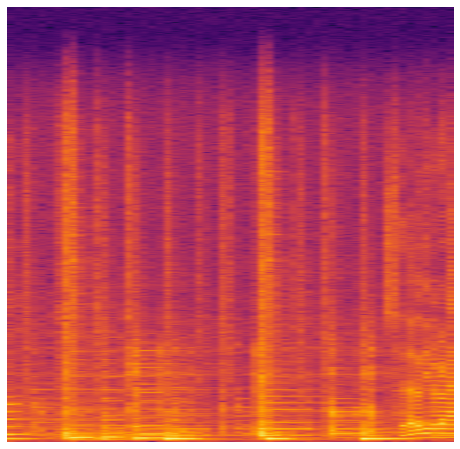

In [30]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for g in genres:
  pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
  for filename in tqdm_notebook(os.listdir(f'.../genres/{g}')):
    songname = f'.../genres/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True,duration=5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
    plt.axis('off');
    plt.savefig(f'img_data/{g}/{filename[:-3].replace(".","")}.png')
    plt.clf()

In [0]:
# Sample spectogram
Image.open('.../img_data/blues/blues00002.png')


Now that the audio files have been converted into their spectograms, we can extract the features from these images.

### Feature Extraction

We will extract the Mel-Frequency capstral coefficients(MFCC), Spectral Centroid, Zero Crossing Rate, Chroma Frequencies and spectral roll-off.

In [0]:
### Creating header for CSV

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1,21):
  header += f' mfcc{i}'

header += ' label'
header = header.split()
header

In [0]:
## Extracting features from spectogram 

file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in tqdm_notebook(os.listdir(f'.../genres/{g}')):
        songname = f'.../genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rmse(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

### Analysing the data 

In [2]:
df = pd.read_csv('.../dataset.csv')
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,26.871927,1.754463,14.238344,-4.830882,9.297965,-0.757741,8.149012,-3.196314,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
1,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,-13.987036,25.754761,-13.649586,11.629271,-11.780589,9.706442,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
2,blues.00005.wav,0.302346,0.103468,1831.942368,1729.483241,3480.937285,0.094040,-177.869048,118.196916,-17.550673,30.758635,-21.742746,11.903802,-20.734249,3.180597,-8.583484,-0.936488,-11.776273,-2.420615,-9.339365,-9.939325,-3.909892,-5.570625,-1.839023,-2.778421,-3.046866,-8.115809,blues
3,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,2.916038,21.523725,-8.554703,23.358672,-10.103616,11.903744,-5.560387,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
4,blues.00006.wav,0.291308,0.141796,1459.078483,1388.913312,2795.616429,0.073028,-190.149470,130.296951,-36.344138,33.013050,11.106936,-0.615158,-20.862010,0.270091,-6.489760,-5.517093,-7.840328,-3.125678,-6.593118,-9.942268,-6.537224,-10.064755,-10.912171,-6.972479,-3.449033,-6.495511,blues


In [3]:
df.shape

(1000, 28)

### Encoding the labels

In [0]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

genre_list = df.iloc[:,-1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

### Feature Scaling 

In [0]:
# dropping the filename column
df2 = df.drop(['filename'], axis=1)

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df2.iloc[:,:-1], dtype=float))

### Dividing the data into training and testing sets 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(len(X_train))
print(len(y_test))

800
200


### K-Nearest Neighbors Classifier 

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knn_y_pred = knn_classifier.predict(X_test)


In [10]:
metrics.confusion_matrix(y_test, knn_y_pred)

array([[10,  0,  3,  1,  0,  0,  1,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  2, 18,  1,  0,  2,  0,  0,  0,  1],
       [ 0,  1,  1, 15,  2,  0,  0,  1,  0,  2],
       [ 0,  0,  3,  4,  9,  0,  4,  1,  1,  1],
       [ 0,  2,  2,  0,  1,  9,  1,  1,  0,  2],
       [ 1,  0,  0,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  1,  0,  2,  2,  0,  0, 18,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  1, 12,  0],
       [ 1,  0,  4,  6,  0,  0,  2,  1,  2,  9]])

In [11]:
print(metrics.classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.65      1.00      0.79        11
           2       0.58      0.67      0.62        27
           3       0.50      0.68      0.58        22
           4       0.60      0.39      0.47        23
           5       0.82      0.50      0.62        18
           6       0.70      0.95      0.81        20
           7       0.78      0.75      0.77        24
           8       0.75      0.80      0.77        15
           9       0.60      0.36      0.45        25

    accuracy                           0.65       200
   macro avg       0.66      0.68      0.65       200
weighted avg       0.66      0.65      0.64       200



In [13]:
knn_y_pred

array([6, 8, 2, 4, 6, 9, 0, 2, 3, 1, 6, 1, 7, 2, 5, 0, 9, 1, 0, 0, 0, 4,
       3, 4, 8, 7, 0, 1, 4, 2, 3, 8, 6, 7, 9, 7, 7, 3, 8, 2, 1, 8, 0, 6,
       2, 7, 8, 1, 7, 5, 3, 2, 2, 2, 7, 9, 5, 0, 9, 3, 7, 6, 1, 2, 4, 1,
       2, 5, 5, 1, 7, 2, 7, 2, 9, 6, 3, 7, 6, 6, 2, 3, 4, 3, 0, 6, 3, 5,
       2, 8, 7, 3, 9, 0, 6, 3, 9, 1, 3, 6, 7, 8, 0, 2, 3, 6, 6, 4, 3, 2,
       3, 5, 4, 5, 9, 9, 2, 3, 8, 5, 7, 2, 1, 9, 0, 8, 3, 2, 9, 6, 4, 6,
       5, 3, 7, 6, 2, 2, 5, 4, 1, 6, 6, 2, 2, 2, 3, 3, 6, 0, 0, 0, 6, 7,
       3, 6, 4, 3, 8, 3, 2, 2, 6, 8, 9, 3, 1, 3, 9, 4, 2, 7, 1, 8, 6, 7,
       2, 6, 8, 1, 7, 3, 4, 3, 3, 9, 3, 4, 7, 2, 8, 8, 4, 2, 7, 6, 7, 1,
       6, 1])

In [0]:
knn_y_pred_labels = encoder.inverse_transform(knn_y_pred)

In [24]:
y_test_labels = encoder.inverse_transform(y_test)


200

In [30]:
results = pd.DataFrame(columns = ['Actual Genre', 'Predicted Genre'])
results['Actual Genre'] = y_test_labels
results['Predicted Genre'] = knn_y_pred_labels

results.head(30)

,Actual Genre,Predicted Genre
0,rock,metal
1,reggae,reggae
2,country,country
3,jazz,hiphop
4,metal,metal
5,rock,rock
6,blues,blues
7,country,country
8,disco,disco
9,pop,classical
